# **NYPD Shooting Incident Data (Historic)**

To begin analyzing the NYPD Shooting Incident Data (Historic), we'll first import the data, clean it up as necessary, and then perform some exploratory data analysis. This will include creating visualizations and building a model to understand patterns

## Step 1. Data Import

Load the data

In [7]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)

# Import the dataset
data_path <- "NYPD_Shooting_Incident_Data__Historic_.csv"
shooting_data <- read_csv(data_path)

# Quick look at the data
head(shooting_data)

Rows: 28562 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (12): OCCUR_DATE, BORO, LOC_OF_OCCUR_DESC, LOC_CLASSFCTN_DESC, LOCATION...
dbl   (7): INCIDENT_KEY, PRECINCT, JURISDICTION_CODE, X_COORD_CD, Y_COORD_CD...
lgl   (1): STATISTICAL_MURDER_FLAG
time  (1): OCCUR_TIME

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,⋯,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
<dbl>,<chr>,<time>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
244608249,05/05/2022,00:10:00,MANHATTAN,INSIDE,14,0,COMMERCIAL,VIDEO STORE,TRUE,⋯,M,BLACK,25-44,M,BLACK,986050,214231.0,40.75469,-73.99350,POINT (-73.9935 40.754692)
247542571,07/04/2022,22:20:00,BRONX,OUTSIDE,48,0,STREET,(null),TRUE,⋯,(null),(null),18-24,M,BLACK,1016802,250581.0,40.85440,-73.88233,POINT (-73.88233 40.854402)
84967535,05/27/2012,19:35:00,QUEENS,NA,103,0,NA,NA,FALSE,⋯,NA,NA,18-24,M,BLACK,1048632,198262.0,40.71063,-73.76777,POINT (-73.76777349199995 40.71063412500007)
202853370,09/24/2019,21:00:00,BRONX,NA,42,0,NA,NA,FALSE,⋯,M,UNKNOWN,25-44,M,BLACK,1014493,242565.0,40.83242,-73.89071,POINT (-73.89071440599997 40.832416753000075)
27078636,02/25/2007,21:00:00,BROOKLYN,NA,83,0,NA,NA,FALSE,⋯,M,BLACK,25-44,M,BLACK,1009149,190104.7,40.68844,-73.91022,POINT (-73.91021857399994 40.68844345900004)
230311078,07/01/2021,23:07:00,MANHATTAN,NA,23,2,NA,MULTI DWELL - PUBLIC HOUS,FALSE,⋯,NA,NA,25-44,M,BLACK,999061,229912.0,40.79773,-73.94651,POINT (-73.94650786199998 40.79772716600007)


## Step 2: Data Cleaning

In [30]:
# Loading necessary libraries
library(tidyr)  # For the drop_na function
library(lubridate)  # For working with dates

# Data transformation and cleaning
shooting_data <- shooting_data %>%
  mutate(
    across(where(is.factor), as.character),  # Converting factors to strings
    OCCUR_DATE = mdy(OCCUR_DATE),  # Using lubridate for correct date conversion
    OCCUR_TIME = hms(OCCUR_TIME)  # Using lubridate for time
  ) %>%
  drop_na()  # Removing rows with missing values

# Checking results after cleaning
head(shooting_data)

INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,⋯,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,hour
<dbl>,<date>,<Period>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
244608249,2022-05-05,10M 0S,MANHATTAN,INSIDE,14,0,COMMERCIAL,VIDEO STORE,TRUE,⋯,BLACK,25-44,M,BLACK,986050,214231,40.75469,-73.99350,POINT (-73.9935 40.754692),0
247542571,2022-07-04,22H 20M 0S,BRONX,OUTSIDE,48,0,STREET,(null),TRUE,⋯,(null),18-24,M,BLACK,1016802,250581,40.85440,-73.88233,POINT (-73.88233 40.854402),22
254911480,2022-11-30,21H 15M 0S,BRONX,OUTSIDE,46,0,STREET,(null),TRUE,⋯,BLACK,<18,M,BLACK,1011263,251671,40.85741,-73.90235,POINT (-73.902346 40.857414),21
249623757,2022-08-15,18H 21M 0S,QUEENS,OUTSIDE,101,2,HOUSING,MULTI DWELL - PUBLIC HOUS,TRUE,⋯,(null),18-24,M,BLACK,1053494,161531,40.60977,-73.75061,POINT (-73.750609 40.609773),18
243433246,2022-04-10,17H 0M 0S,BRONX,OUTSIDE,49,0,STREET,(null),FALSE,⋯,(null),18-24,M,BLACK HISPANIC,1021686,251947,40.85813,-73.86467,POINT (-73.864665 40.858133),17
253757468,2022-11-07,11H 35M 0S,BROOKLYN,OUTSIDE,75,0,STREET,(null),TRUE,⋯,(null),25-44,M,BLACK,1019908,184675,40.67350,-73.87145,POINT (-73.871451 40.673496),11


## Step 3 Exploratory Data Analysis (EDA)

Now we can perform some basic analysis to better understand the characteristics of the data. We will focus on the following aspects:

- Distribution of incidents by boroughs.
- Distribution of incidents over time (year, month, day of the week).

### Distribution of incidents by boroughs.

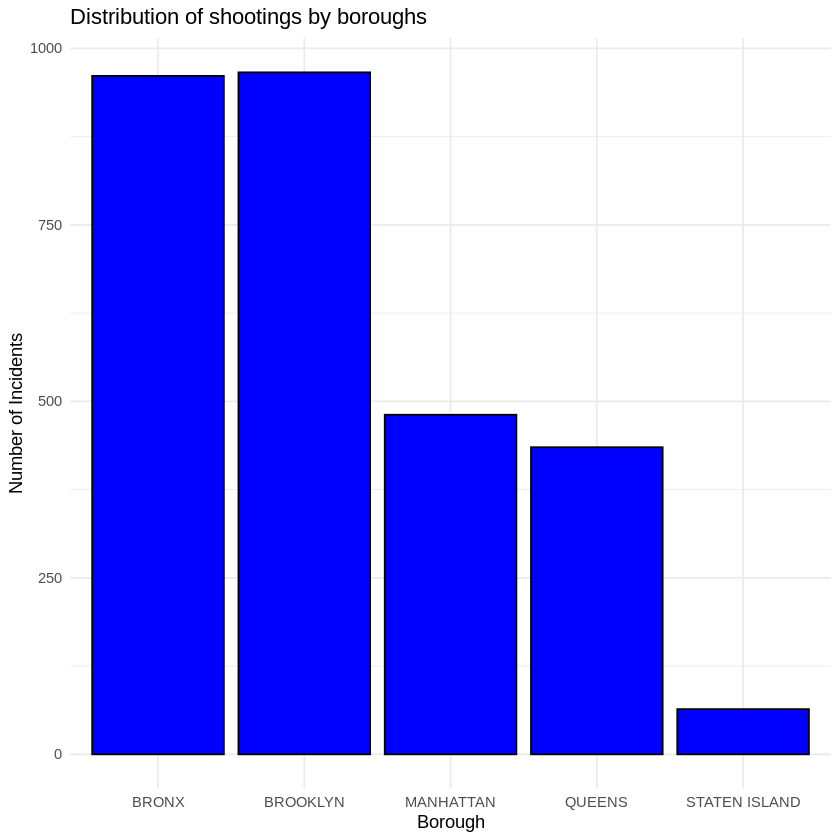

In [31]:
# Visualization of the number of incidents by boroughs
ggplot(shooting_data, aes(x = BORO)) +
  geom_bar(fill = "blue", color = "black") +
  theme_minimal() +
  labs(title = "Distribution of shootings by boroughs", x = "Borough", y = "Number of Incidents")


### Distribution of incidents over time (year, month, day of the week).

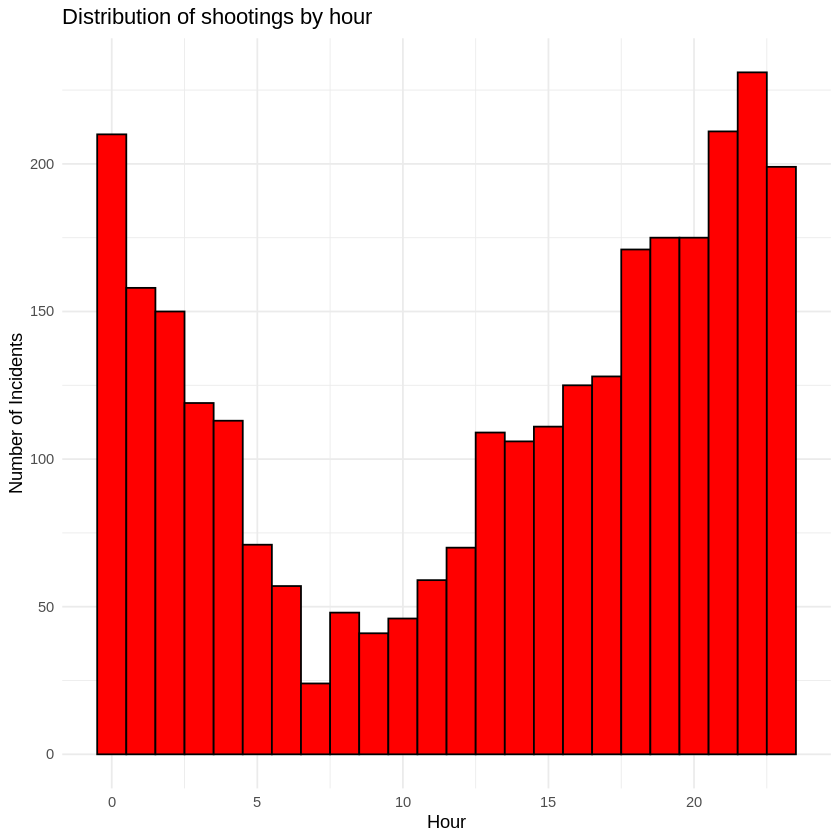

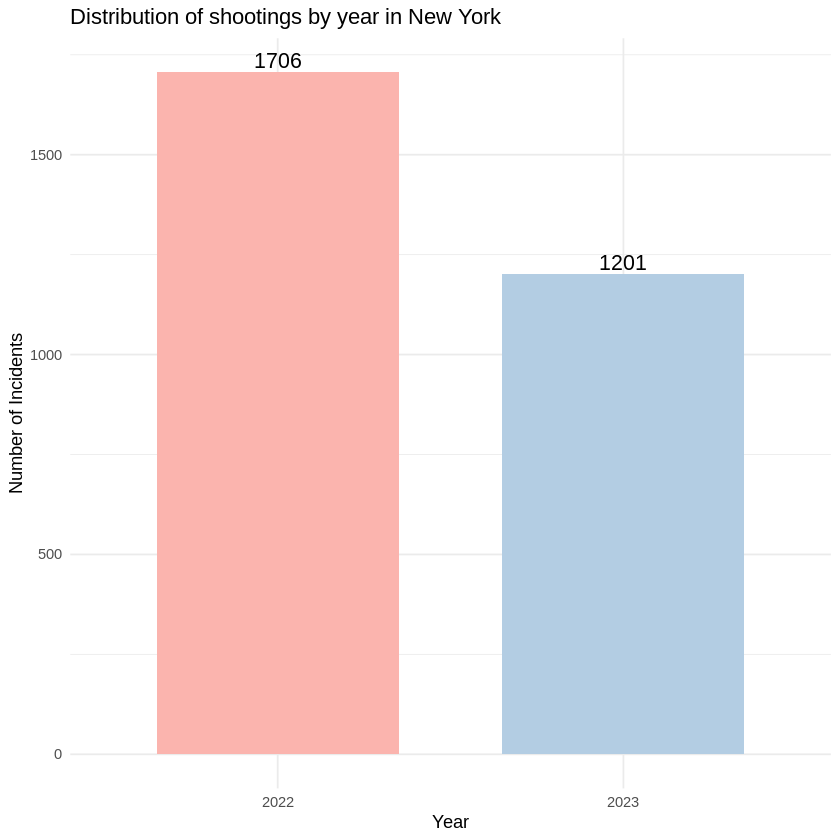

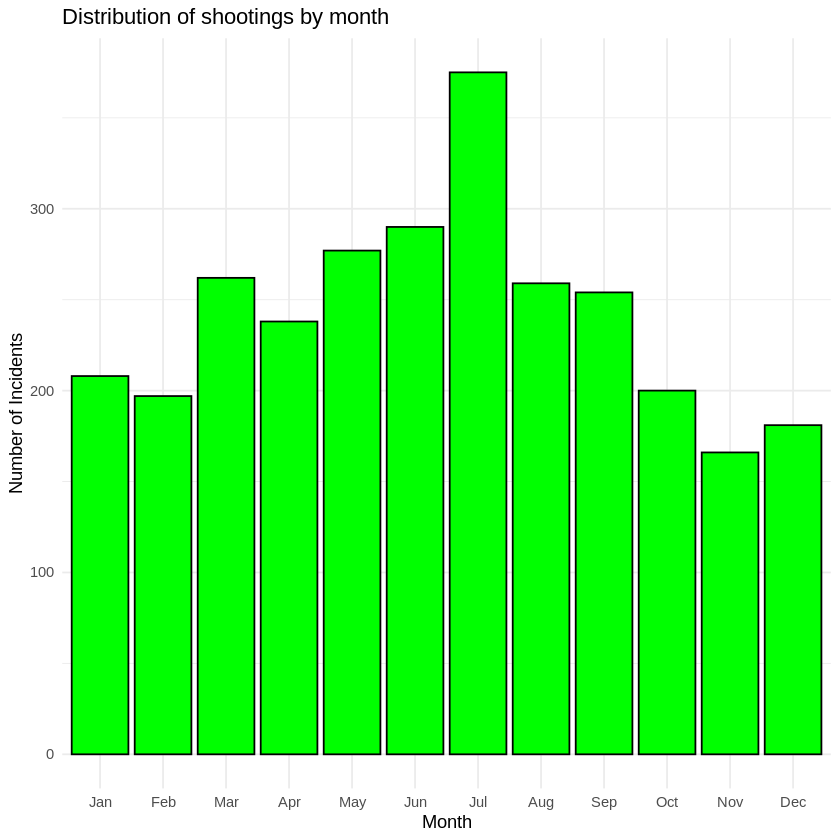

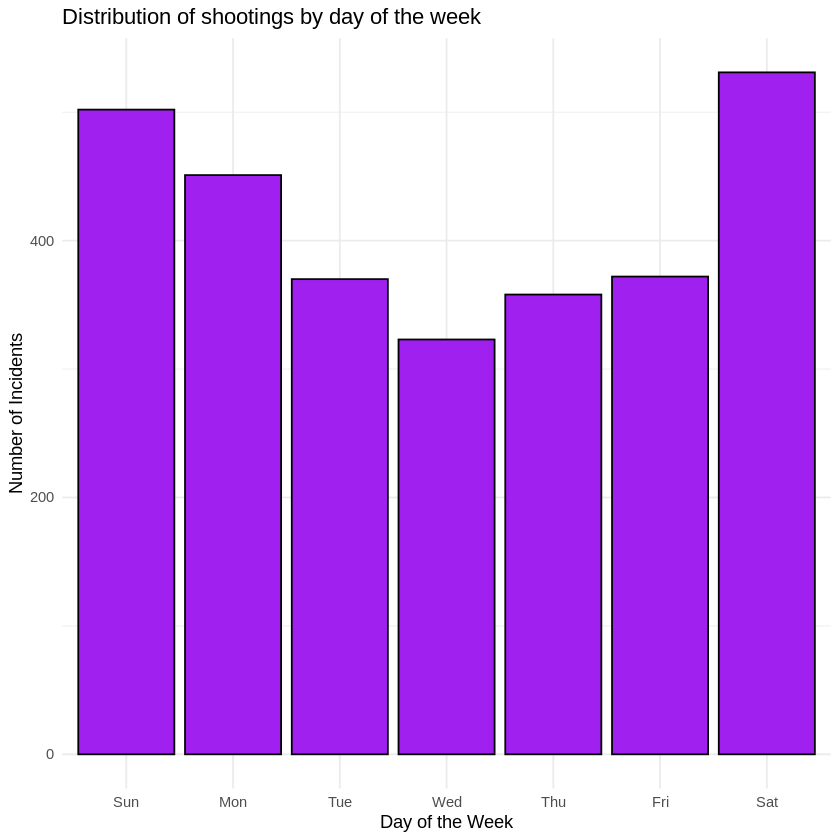

In [45]:
library(ggplot2)
library(lubridate)  # Ensure lubridate is loaded for date-time manipulation

# Adding year, month, and day of the week columns
shooting_data <- shooting_data %>%
  mutate(
    year = year(OCCUR_DATE),
    month = month(OCCUR_DATE, label = TRUE),  # Month as an abbreviated text (e.g., Jan, Feb, etc.)
    day_of_week = wday(OCCUR_DATE, label = TRUE)  # Day of week as an abbreviated text (e.g., Mon, Tue, etc.)
  )

# Visualization of the number of incidents by hour
ggplot(shooting_data, aes(x = hour)) +
  geom_histogram(bins = 24, fill = "red", color = "black") +  # Directly specify the number of bins
  theme_minimal() +
  labs(title = "Distribution of shootings by hour", x = "Hour", y = "Number of Incidents")

# Preparing data for visualization
borough_counts <- shooting_data %>%
  group_by(year = year(OCCUR_DATE)) %>%
  summarise(Incidents = n(), .groups = 'drop')  # Counting the number of incidents by year

# Creating the visualization with improvements
ggplot(borough_counts, aes(x = factor(year), y = Incidents, fill = factor(year))) +
  geom_col(width = 0.7, show.legend = FALSE) +  # Reduce the width of bars for better visual distinction
  geom_text(aes(label = Incidents), vjust = -0.3, color = "black", size = 4.5) +  # Add text above the bars
  scale_fill_brewer(palette = "Pastel1") +  # Use a color palette to differentiate years
  labs(title = "Distribution of shootings by year in New York",
       x = "Year",
       y = "Number of Incidents") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5))  # Improve labels on the X-axis for better readability

# Visualization of the number of incidents by month
ggplot(shooting_data, aes(x = month)) +
  geom_bar(fill = "green", color = "black") +
  theme_minimal() +
  labs(title = "Distribution of shootings by month", x = "Month", y = "Number of Incidents")

# Visualization of the number of incidents by day of the week
ggplot(shooting_data, aes(x = day_of_week)) +
  geom_bar(fill = "purple", color = "black") +
  theme_minimal() +
  labs(title = "Distribution of shootings by day of the week", x = "Day of the Week", y = "Number of Incidents")

## Step 4: Building the Model

For modeling, logistic regression can be used to predict the probability of a shooting resulting in a homicide, using available factors such as borough, time of day, and others.

In [38]:
# Adding the hour column to the main dataframe
shooting_data <- shooting_data %>%
  mutate(hour = hour(OCCUR_TIME))

# Preparing data for the model
model_data <- shooting_data %>%
  filter(!is.na(PERP_RACE)) %>%  # Removing NA values for the PERP_RACE variable
  mutate(murder = as.integer(STATISTICAL_MURDER_FLAG),  # Converting the logical variable to numeric
         hour = hour(OCCUR_TIME))  # Ensuring the hour column is added correctly

# Checking the presence of the 'hour' variable
head(model_data$hour)

# Building a logistic regression
model <- glm(murder ~ BORO + hour + PERP_RACE, data = model_data, family = "binomial")
summary(model)

[1]  0 22 21 18 17 11


Call:
glm(formula = murder ~ BORO + hour + PERP_RACE, family = "binomial", 
    data = model_data)

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)                        -1.839145   0.136564 -13.467  < 2e-16 ***
BOROBROOKLYN                       -0.072631   0.116750  -0.622 0.533867    
BOROMANHATTAN                      -0.127694   0.139655  -0.914 0.360533    
BOROQUEENS                         -0.224405   0.150400  -1.492 0.135685    
BOROSTATEN ISLAND                   0.097539   0.318741   0.306 0.759594    
hour                                0.013108   0.005997   2.186 0.028840 *  
PERP_RACEASIAN / PACIFIC ISLANDER   0.689056   0.450229   1.530 0.125903    
PERP_RACEBLACK                      0.514890   0.109425   4.705 2.53e-06 ***
PERP_RACEBLACK HISPANIC             0.703600   0.189882   3.705 0.000211 ***
PERP_RACEUNKNOWN                  -10.743411 324.743727  -0.033 0.973609    
PERP_RACEWHITE                     -0.

## Step 5: Interpretation of results

The output from the logistic regression model provides insights into the relationship between the probability of a shooting incident being classified as a murder and several predictor variables such as borough, hour of the incident, and perpetrator's race. Here is a detailed interpretation of the model's coefficients:

### Interpretation of Coefficients:

- **(Intercept):** The intercept term (-1.839145) represents the log odds of a shooting incident being classified as a murder when all other predictor variables are zero. The statistical significance (p < 0.001) indicates a strong baseline effect in the data.

- **Borough Coefficients:**
  - **BOROBROOKLYN, BOROMANHATTAN, BOROQUEENS, BOROSTATEN ISLAND:** These coefficients represent the log odds of a murder in these boroughs compared to the baseline borough (Bronx). None of these borough coefficients are statistically significant (p > 0.05), suggesting that, after controlling for other factors, there is no strong evidence of differences in the log odds of a murder across these boroughs compared to the Bronx.

- **hour:** The coefficient for hour (0.013108) indicates a small increase in the log odds of a shooting being a murder for each additional hour of the day, with a p-value of 0.028840, suggesting this effect is statistically significant at the 5% level.

- **Perpetrator Race Coefficients:**
  - **PERP_RACEASIAN / PACIFIC ISLANDER, PERP_RACEBLACK, PERP_RACEBLACK HISPANIC, PERP_RACEUNKNOWN, PERP_RACEWHITE, PERP_RACEWHITE HISPANIC:** These coefficients compare the log odds of a shooting being a murder for perpetrators of each race compared to the reference category (likely another race not listed). Significant p-values for BLACK (p < 0.001) and WHITE HISPANIC (p < 0.001) races indicate that shootings involving these racial groups are significantly more likely to be classified as murders compared to the reference racial group. The extremely large coefficient and standard error for PERP_RACEUNKNOWN suggest instability in this estimate, likely due to very few or no observations in this category.

### Model Fit and Summary:

- **Null Deviance vs. Residual Deviance:** The reduction in deviance from 2943.9 on 2906 degrees of freedom in the null model (no predictors) to 2893.3 on 2895 degrees of freedom in the model with predictors shows that the predictors contribute to explaining the variability in the outcome.

- **AIC (Akaike Information Criterion):** The AIC of the model is 2917.3. This value helps in comparing different models, with a lower AIC indicating a model with a better fit to the data.

- **Number of Iterations:** The model took 11 iterations to converge, which is typical for logistic regression models and suggests that the fitting process was stable.

### Conclusions:

The model suggests that the hour of the incident and certain racial categories of the perpetrator are significant predictors of whether a shooting incident is classified as a murder, after controlling for the borough of the incident. The lack of significant effects for most boroughs suggests that, within the context of this model, borough may not be a strong predictor of the incident being classified as a murder compared to other factors such as the time of the incident and the race of the perpetrator.

## Number of shootings by boroughs in New York

For this visualization, we can use a bar chart that will clearly demonstrate the differences between boroughs. Here is how you can create such a diagram in R using the `ggplot2` library:

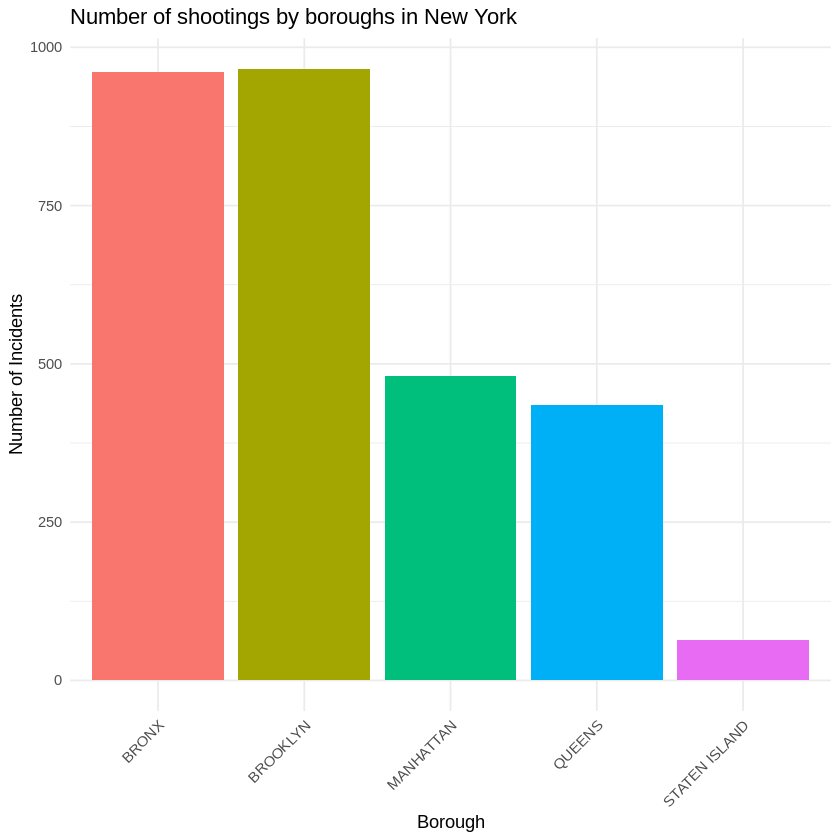

In [40]:
library(ggplot2)

# Preparing data for visualization
borough_counts <- shooting_data %>%
  group_by(BORO) %>%
  summarise(Incidents = n(), .groups = 'drop')  # Counting the number of incidents by boroughs

# Creating the visualization
ggplot(borough_counts, aes(x = BORO, y = Incidents, fill = BORO)) +
  geom_col(show.legend = FALSE) +  # Bar chart
  labs(title = "Number of shootings by boroughs in New York",
       x = "Borough",
       y = "Number of Incidents") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Angling the text on the X-axis for better readability

## Step 6. Bias Identification

Identifying potential biases in the dataset and the analysis is crucial for ensuring the validity and reliability of the findings. Here are some possible sources of bias that could affect the dataset and subsequent analysis:

1. **Reporting Bias**: There might be inconsistencies in how incidents are reported across different boroughs or precincts. Some areas might have higher reporting rates due to more active community policing, better public awareness, or more surveillance. This could lead to an overrepresentation of incidents in these areas.

2. **Selection Bias**: The data might not be representative of all shooting incidents. For example, if the dataset primarily includes incidents that were reported to the police or covered in the media, it may omit unreported cases, which could skew the analysis.

3. **Measurement Bias**: The accuracy of the data entries, such as the exact time of incidents or the classification of incidents as homicides, could be prone to human error or subjective judgment by the reporting officer.

4. **Geographical Bias**: The dataset might cover some geographical areas more thoroughly than others, possibly overlooking rural or less populated areas in favor of urban centers.

5. **Temporal Bias**: The data might reflect certain time periods more than others. For instance, if data collection was more rigorous in recent years, earlier years might be underrepresented, leading to an inaccurate trend analysis over time.

6. **Socioeconomic Bias**: Incidents might be more frequently or thoroughly reported in certain socioeconomic areas due to varying levels of police presence or community response.

Discussing and addressing these potential biases is essential for interpreting the results accurately and for making informed decisions based on the analysis.